In [ ]:
#import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest

In [ ]:
# URL to import data set.
url = ''

In [ ]:
df = pd.read_csv(url)

In [ ]:
df.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp
0,682,2.391656,4.617196,2.848982,76.272417,69.884609
1,605,5.466877,6.424361,5.727520,73.222679,74.907314
2,658,3.434232,3.680896,1.678708,88.089916,78.704806
3,749,2.094656,7.120927,1.639670,77.661625,82.386700
4,676,3.538228,5.956472,3.225336,75.226352,67.153220


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine rpm        19535 non-null  int64  
 1   Lub oil pressure  19535 non-null  float64
 2   Fuel pressure     19535 non-null  float64
 3   Coolant pressure  19535 non-null  float64
 4   lub oil temp      19535 non-null  float64
 5   Coolant temp      19535 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 915.8 KB


# Data Cleaning

In [ ]:
#identifying duplicate values
df.duplicated().any()

False

In [ ]:
#identifying missing values
df.isnull().sum()

Engine rpm          0
Lub oil pressure    0
Fuel pressure       0
Coolant pressure    0
lub oil temp        0
Coolant temp        0
dtype: int64

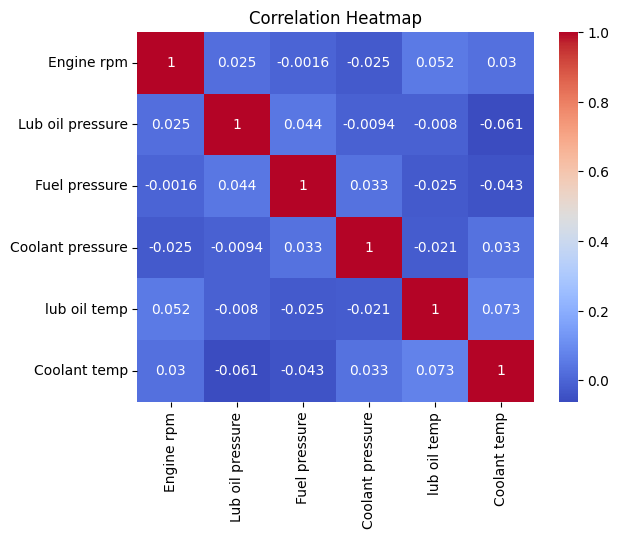

In [ ]:
#visualise correlation heatmap
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Descriptive statistics

In [ ]:
df.describe()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp
count,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000
mean,791.239263,3.303775,6.655615,2.335369,77.643420,78.427433
std,267.611193,1.021643,2.761021,1.036382,3.110984,6.206749
min,61.000000,0.003384,0.003187,0.002483,71.321974,61.673325
25%,593.000000,2.518815,4.916886,1.600466,75.725990,73.895421
50%,746.000000,3.162035,6.201720,2.166883,76.817350,78.346662
75%,934.000000,4.055272,7.744973,2.848840,78.071691,82.915411
max,2239.000000,7.265566,21.138326,7.478505,89.580796,195.527912


# Exploratory data analysis

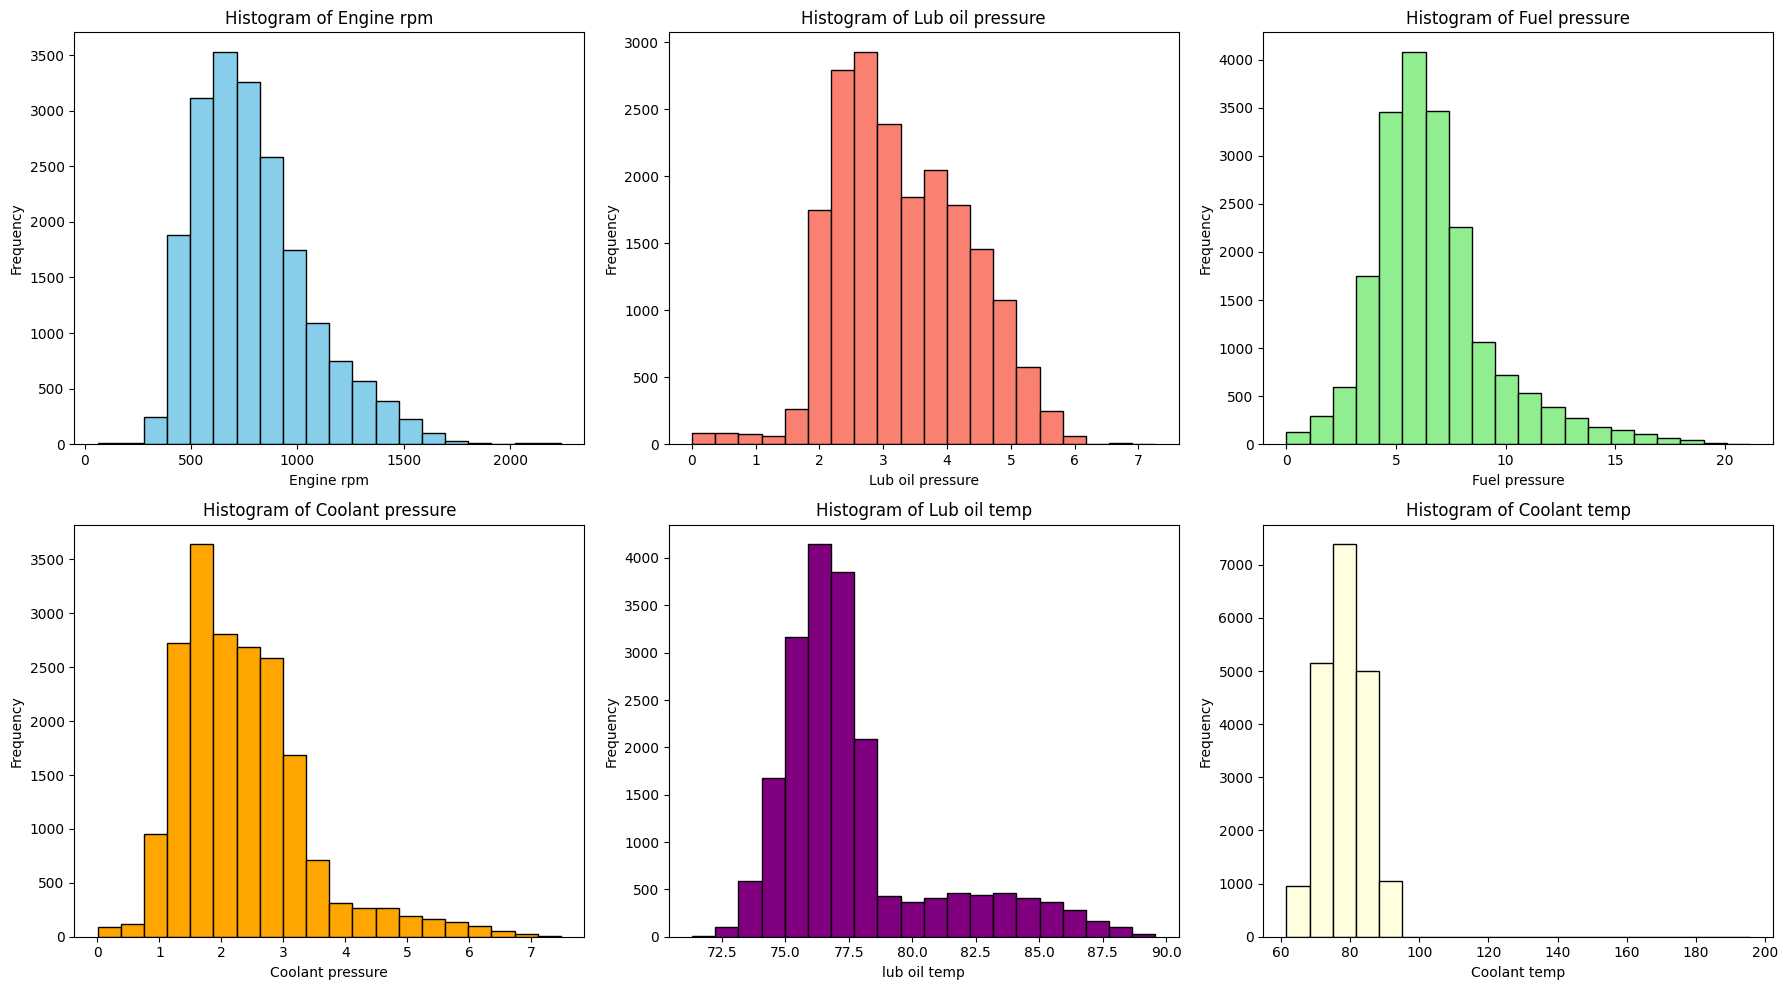

In [ ]:
plt.figure(figsize=(18,10))
plt.subplot(2, 3, 1)
plt.hist(df['Engine rpm'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Engine rpm')
plt.xlabel('Engine rpm')
plt.ylabel('Frequency')

plt.subplot(2, 3, 2)
plt.hist(df['Lub oil pressure'], bins=20, color='salmon', edgecolor='black')
plt.title('Histogram of Lub oil pressure')
plt.xlabel('Lub oil pressure')
plt.ylabel('Frequency')

plt.subplot(2, 3, 3)
plt.hist(df['Fuel pressure'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Histogram of Fuel pressure')
plt.xlabel('Fuel pressure')
plt.ylabel('Frequency')

plt.subplot(2, 3, 4)
plt.hist(df['Coolant pressure'], bins=20, color='orange', edgecolor='black')
plt.title('Histogram of Coolant pressure')
plt.xlabel('Coolant pressure')
plt.ylabel('Frequency')

plt.subplot(2, 3, 5)
plt.hist(df['lub oil temp'], bins=20, color='purple', edgecolor='black')
plt.title('Histogram of Lub oil temp')
plt.xlabel('lub oil temp')
plt.ylabel('Frequency')

plt.subplot(2, 3, 6)
plt.hist(df['Coolant temp'], bins=20, color='lightyellow', edgecolor='black')
plt.title('Histogram of Coolant temp')
plt.xlabel('Coolant temp')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

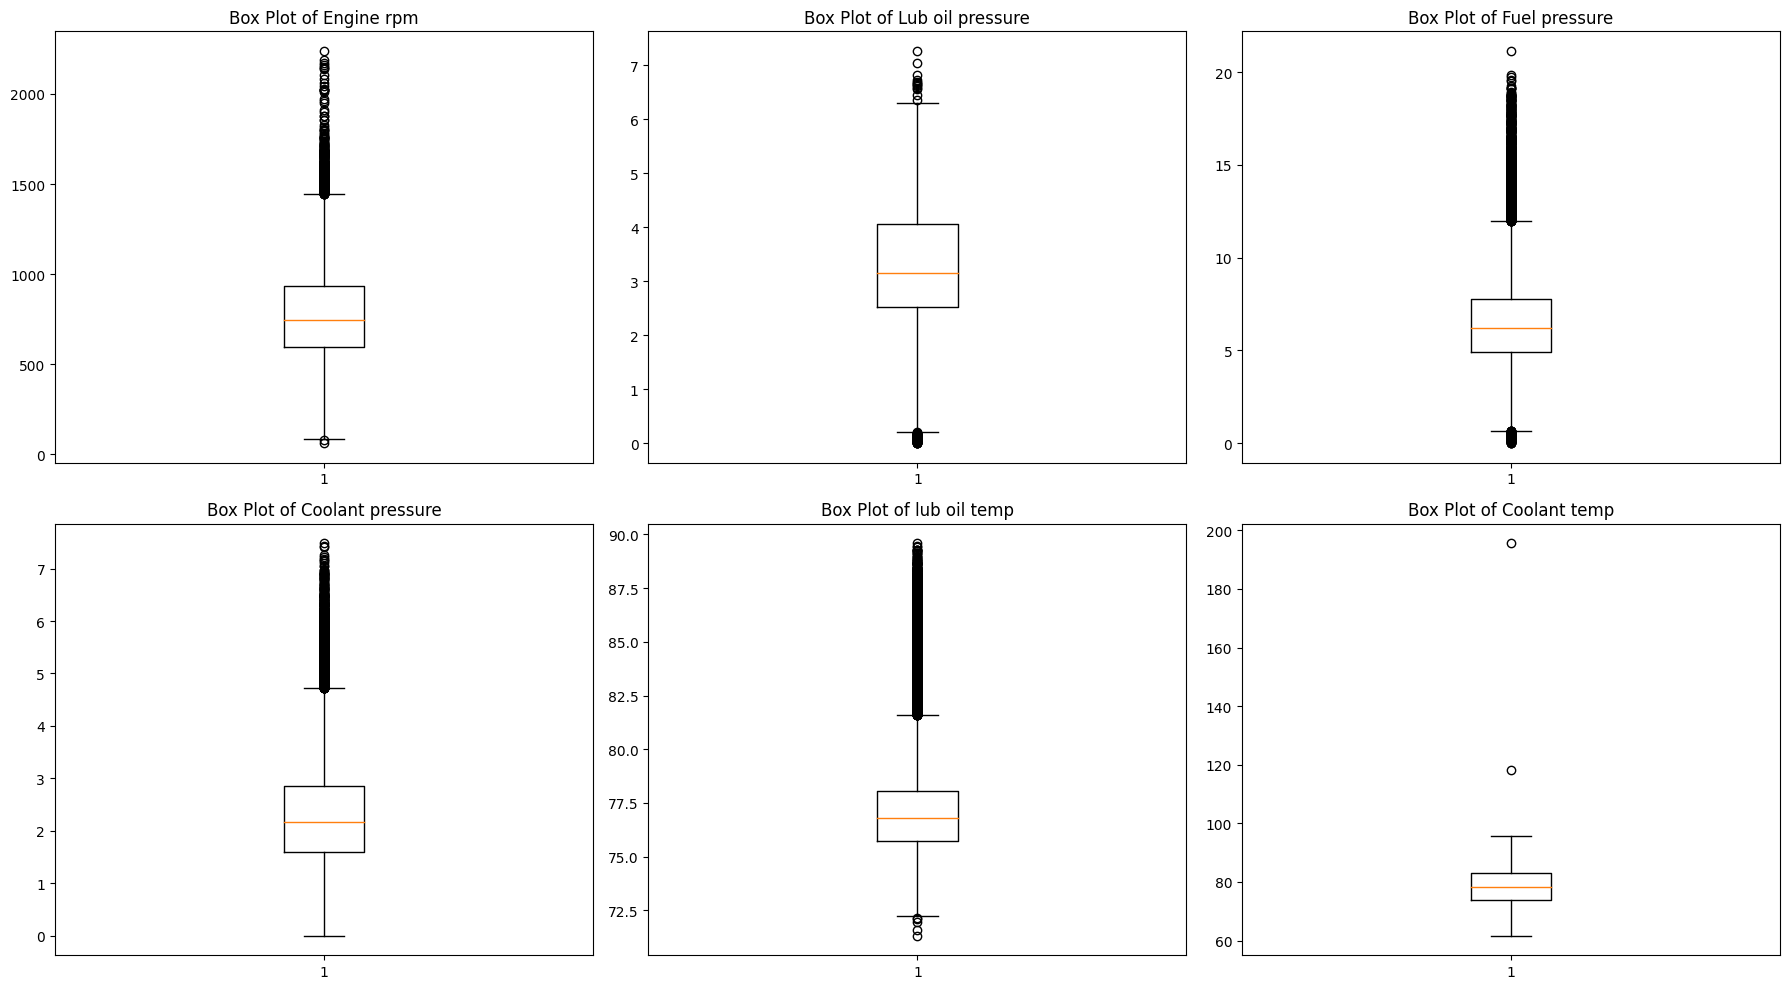

In [ ]:
plt.figure(figsize=(18, 10))
plt.subplot(2, 3, 1)
plt.boxplot(df['Engine rpm'])
plt.title('Box Plot of Engine rpm')

plt.subplot(2, 3, 2)
plt.boxplot(df['Lub oil pressure'])
plt.title('Box Plot of Lub oil pressure')

plt.subplot(2, 3, 3)
plt.boxplot(df['Fuel pressure'])
plt.title('Box Plot of Fuel pressure')

plt.subplot(2, 3, 4)
plt.boxplot(df['Coolant pressure'])
plt.title('Box Plot of Coolant pressure')

plt.subplot(2, 3, 5)
plt.boxplot(df['lub oil temp'])
plt.title('Box Plot of lub oil temp')

plt.subplot(2, 3, 6)
plt.boxplot(df['Coolant temp'])
plt.title('Box Plot of Coolant temp')


plt.tight_layout()
plt.show()

# Anomaly Detection

## Using interquartile range (IQR) method to identify outliers for each feature.

In [ ]:
outlier_df = df.copy()

In [ ]:
for col in outlier_df.columns:

    Q1 = outlier_df[col].quantile(0.25)
    Q3 = outlier_df[col].quantile(0.75)
    IQR = Q3 - Q1

    outlier_df[f'Outlier_{col}'] = ((outlier_df[col] < (Q1 - 1.5 * IQR)) | (outlier_df[col] > (Q3 + 1.5 * IQR))).astype(int)

outlier_df


,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Outlier_Engine rpm,Outlier_Lub oil pressure,Outlier_Fuel pressure,Outlier_Coolant pressure,Outlier_lub oil temp,Outlier_Coolant temp
0,682,2.391656,4.617196,2.848982,76.272417,69.884609,0,0,0,0,0,0
1,605,5.466877,6.424361,5.727520,73.222679,74.907314,0,0,0,1,0,0
2,658,3.434232,3.680896,1.678708,88.089916,78.704806,0,0,0,0,1,0
3,749,2.094656,7.120927,1.639670,77.661625,82.386700,0,0,0,0,0,0
4,676,3.538228,5.956472,3.225336,75.226352,67.153220,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
19530,681,3.598792,7.300853,1.083391,76.206955,69.848780,0,0,0,0,0,0
19531,580,2.243040,5.242489,1.471350,76.884907,87.098119,0,0,0,0,0,0
19532,616,3.310048,3.787693,6.001031,75.889810,72.220009,0,0,0,1,0,0
19533,1163,2.731726,3.703595,2.951684,76.784626,81.400088,0,0,0,0,0,0


In [ ]:
# filtering out samples
outliers_count = outlier_df.filter(like='Outlier').sum(axis=1)
outlier_df['anomaly'] = (outliers_count >= 2).astype(int)
outlier_df

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Outlier_Engine rpm,Outlier_Lub oil pressure,Outlier_Fuel pressure,Outlier_Coolant pressure,Outlier_lub oil temp,Outlier_Coolant temp,anomaly
0,682,2.391656,4.617196,2.848982,76.272417,69.884609,0,0,0,0,0,0,0
1,605,5.466877,6.424361,5.727520,73.222679,74.907314,0,0,0,1,0,0,0
2,658,3.434232,3.680896,1.678708,88.089916,78.704806,0,0,0,0,1,0,0
3,749,2.094656,7.120927,1.639670,77.661625,82.386700,0,0,0,0,0,0,0
4,676,3.538228,5.956472,3.225336,75.226352,67.153220,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19530,681,3.598792,7.300853,1.083391,76.206955,69.848780,0,0,0,0,0,0,0
19531,580,2.243040,5.242489,1.471350,76.884907,87.098119,0,0,0,0,0,0,0
19532,616,3.310048,3.787693,6.001031,75.889810,72.220009,0,0,0,1,0,0,0
19533,1163,2.731726,3.703595,2.951684,76.784626,81.400088,0,0,0,0,0,0,0


In [ ]:
# outlier percentage
outlier_percentage = (outlier_df['anomaly'].sum()/len(outlier_df))*100
outlier_percentage

2.160225236754543

In [ ]:
# checking samples who have all features under outlier category
outlier_df[outliers_count == len(df.columns)]

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Outlier_Engine rpm,Outlier_Lub oil pressure,Outlier_Fuel pressure,Outlier_Coolant pressure,Outlier_lub oil temp,Outlier_Coolant temp,anomaly


## Anomaly detection using OneClassSVM

Feature Scaling

In [ ]:
# Using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

scaled_df.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp
0,0.285124,0.328864,0.218310,0.380751,0.271126,0.061345
1,0.249770,0.752321,0.303815,0.765787,0.104098,0.098868
2,0.274105,0.472427,0.174009,0.224214,0.918347,0.127239
3,0.315886,0.287968,0.336773,0.218992,0.347210,0.154745
4,0.282369,0.486747,0.281677,0.431092,0.213835,0.040939


Now lets apply one-class SVM to the scaled dataframe.

In [ ]:
model = OneClassSVM(kernel='rbf', gamma=0.2, nu=0.03)
model.fit(scaled_df)

OneClassSVM(gamma=0.2, nu=0.03)

In [ ]:
anomaly = model.predict(scaled_df)
anomaly

array([ 1, -1, -1, ...,  1,  1,  1])

In [ ]:
svm_df = df.copy()
svm_df['anomaly']= anomaly
svm_df

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,anomaly
0,682,2.391656,4.617196,2.848982,76.272417,69.884609,1
1,605,5.466877,6.424361,5.727520,73.222679,74.907314,-1
2,658,3.434232,3.680896,1.678708,88.089916,78.704806,-1
3,749,2.094656,7.120927,1.639670,77.661625,82.386700,1
4,676,3.538228,5.956472,3.225336,75.226352,67.153220,1
...,...,...,...,...,...,...,...
19530,681,3.598792,7.300853,1.083391,76.206955,69.848780,1
19531,580,2.243040,5.242489,1.471350,76.884907,87.098119,1
19532,616,3.310048,3.787693,6.001031,75.889810,72.220009,1
19533,1163,2.731726,3.703595,2.951684,76.784626,81.400088,1




> Predicting anomalies where '-1' indicates an anomaly and '1' indicates normal behavior.



In [ ]:
# Display only anomalies in the DataFrame.
only_anomalies = svm_df[svm_df.anomaly == -1]
print(only_anomalies.shape)
only_anomalies

(585, 7)


,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,anomaly
1,605,5.466877,6.424361,5.727520,73.222679,74.907314,-1
2,658,3.434232,3.680896,1.678708,88.089916,78.704806,-1
9,806,3.946885,21.138326,1.572569,74.923316,72.112692,-1
17,1312,5.963439,7.563578,5.931953,77.738876,88.661972,-1
144,1762,1.697487,4.327845,2.523372,86.750349,82.393211,-1
...,...,...,...,...,...,...,...
19281,910,5.879543,10.402309,6.287980,75.755957,68.748518,-1
19370,740,2.792556,11.359028,1.580190,88.791884,70.047659,-1
19375,999,0.126660,5.106325,3.938253,74.645346,92.353698,-1
19409,655,4.058542,5.216858,1.872694,89.029437,78.482379,-1


In [ ]:
# outlier percentage
outlier_percentage = ((svm_df['anomaly'] == -1).sum()/len(svm_df))*100
outlier_percentage

2.9946250319938574

In [ ]:
scaled_df[features].head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp
0,0.285124,0.328864,0.218310,0.380751,0.271126,0.061345
1,0.249770,0.752321,0.303815,0.765787,0.104098,0.098868
2,0.274105,0.472427,0.174009,0.224214,0.918347,0.127239
3,0.315886,0.287968,0.336773,0.218992,0.347210,0.154745
4,0.282369,0.486747,0.281677,0.431092,0.213835,0.040939


In [ ]:
# Using PCA for dimensionality reduction
pca = PCA(n_components = 2)
components = pca.fit_transform(scaled_df[features])
components[:5]

array([[-0.07613435, -0.15533677],
       [-0.27824719,  0.22314841],
       [ 0.5753444 , -0.00113707],
       [ 0.00755991, -0.14748012],
       [-0.14300989,  0.00502428]])

In [ ]:
# creating dataframe for PCA model data
pca_df = pd.DataFrame(data = components,columns=['pca_1','pca_2'])
pca_df.head()

,pca_1,pca_2
0,-0.076134,-0.155337
1,-0.278247,0.223148
2,0.575344,-0.001137
3,0.007560,-0.147480
4,-0.143010,0.005024


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneClassSVM was fitted with feature names
  warnings.warn(


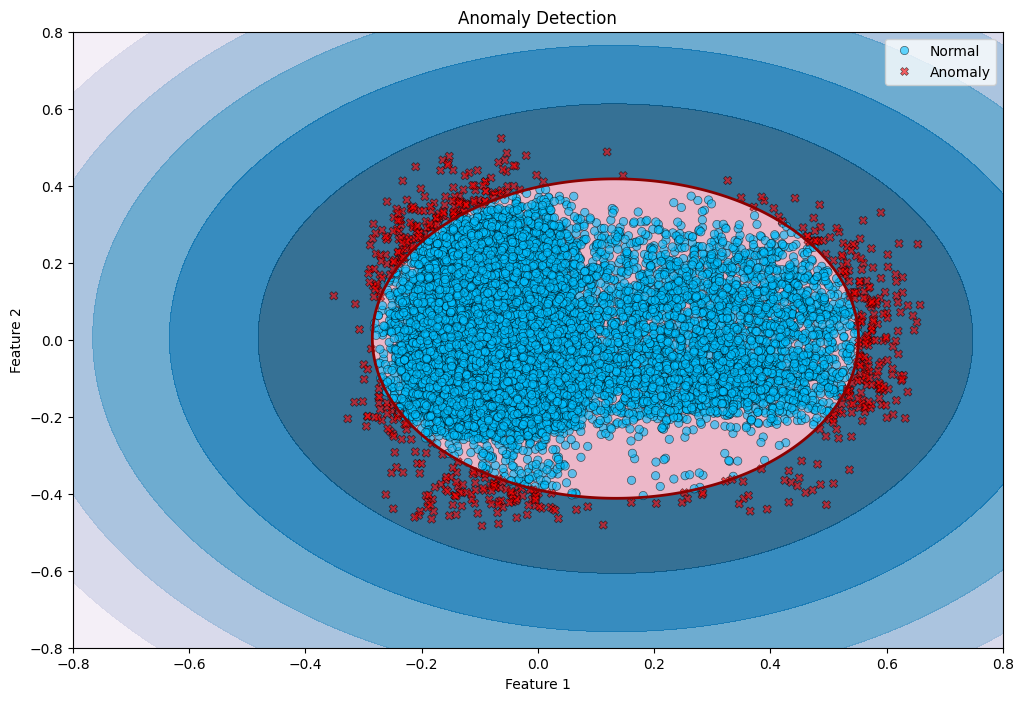

In [ ]:
# for 2D visualisation
model = OneClassSVM(kernel='rbf', gamma=0.2, nu=0.03)
model.fit(pca_df)

plt.figure(figsize=(12, 8))
plt.title('Anomaly Detection')

xx, yy = np.meshgrid(np.linspace(-0.8, 0.8, 500), np.linspace(-0.8, 0.8, 500))
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

y_pred = model.predict(pca_df)

plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu, alpha=0.8)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')  # Decision boundary
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred', alpha=0.5)

sns.scatterplot(x=pca_df['pca_1'], y=pca_df['pca_2'], hue=np.where(y_pred == 1, 'Normal', 'Anomaly'),
                    style=np.where(y_pred == -1, 'Anomaly', 'Normal'), markers={'Anomaly': 'X', 'Normal': 'o'},
                    palette={'Normal': 'deepskyblue', 'Anomaly': 'red'}, alpha=0.6, edgecolor='k')


plt.axis('tight')
plt.xlim((-0.8, 0.8))
plt.ylim((-0.8, 0.8))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

## Detecting anomalies using Isolation Forest algorithm

In [ ]:
iso_forest = IsolationForest(contamination=0.03, random_state=42)
iso_forest.fit(scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.03, random_state=42)

In [ ]:
# predicting anomalies
outlier = iso_forest.predict(scaled_df)
outlier

array([ 1, -1,  1, ...,  1,  1,  1])

In [ ]:
iso_df = df.copy()
iso_df['anomaly'] = outlier
iso_df

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,anomaly
0,682,2.391656,4.617196,2.848982,76.272417,69.884609,1
1,605,5.466877,6.424361,5.727520,73.222679,74.907314,-1
2,658,3.434232,3.680896,1.678708,88.089916,78.704806,1
3,749,2.094656,7.120927,1.639670,77.661625,82.386700,1
4,676,3.538228,5.956472,3.225336,75.226352,67.153220,1
...,...,...,...,...,...,...,...
19530,681,3.598792,7.300853,1.083391,76.206955,69.848780,1
19531,580,2.243040,5.242489,1.471350,76.884907,87.098119,1
19532,616,3.310048,3.787693,6.001031,75.889810,72.220009,1
19533,1163,2.731726,3.703595,2.951684,76.784626,81.400088,1


In [ ]:
((iso_df['anomaly'] == -1).sum()/len(svm_df))*100

3.0048630662912723

For visualising the anomalies generated in isolation forest model in 2D, I used PCA model to get 2D data.

In [ ]:
pcaiso_forest = IsolationForest(contamination=0.03, random_state=42)
pcaiso_forest.fit(pca_df)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.03, random_state=42)

In [ ]:
outlier = pcaiso_forest.predict(pca_df)
outlier

array([ 1, -1, -1, ...,  1,  1,  1])

In [ ]:
pcaiso_df = df.copy()
pcaiso_df['anomaly'] = outlier
pcaiso_df

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,anomaly
0,682,2.391656,4.617196,2.848982,76.272417,69.884609,1
1,605,5.466877,6.424361,5.727520,73.222679,74.907314,-1
2,658,3.434232,3.680896,1.678708,88.089916,78.704806,-1
3,749,2.094656,7.120927,1.639670,77.661625,82.386700,1
4,676,3.538228,5.956472,3.225336,75.226352,67.153220,1
...,...,...,...,...,...,...,...
19530,681,3.598792,7.300853,1.083391,76.206955,69.848780,1
19531,580,2.243040,5.242489,1.471350,76.884907,87.098119,1
19532,616,3.310048,3.787693,6.001031,75.889810,72.220009,1
19533,1163,2.731726,3.703595,2.951684,76.784626,81.400088,1


In [ ]:
# Display only anomalies in the DataFrame.
only_anomalies = pcaiso_df[pcaiso_df.anomaly == -1]
print(only_anomalies.shape)
only_anomalies

(587, 7)


,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,anomaly
1,605,5.466877,6.424361,5.727520,73.222679,74.907314,-1
2,658,3.434232,3.680896,1.678708,88.089916,78.704806,-1
13,978,4.366676,6.638085,2.829643,88.038301,78.488782,-1
131,830,3.231908,13.479172,2.568096,87.480362,73.428213,-1
144,1762,1.697487,4.327845,2.523372,86.750349,82.393211,-1
...,...,...,...,...,...,...,...
19375,999,0.126660,5.106325,3.938253,74.645346,92.353698,-1
19409,655,4.058542,5.216858,1.872694,89.029437,78.482379,-1
19478,891,0.345441,6.391581,1.405383,77.480034,84.553001,-1
19501,450,0.699888,4.111952,0.949993,74.869050,72.889809,-1


In [ ]:
updated_df = pd.concat([pca_df,pcaiso_df['anomaly']],axis=1)
updated_df

,pca_1,pca_2,anomaly
0,-0.076134,-0.155337,1
1,-0.278247,0.223148,-1
2,0.575344,-0.001137,-1
3,0.007560,-0.147480,1
4,-0.143010,0.005024,1
...,...,...,...
19530,-0.076843,0.059237,1
19531,-0.034686,-0.155403,1
19532,-0.122547,-0.091615,1
19533,-0.028597,-0.102462,1


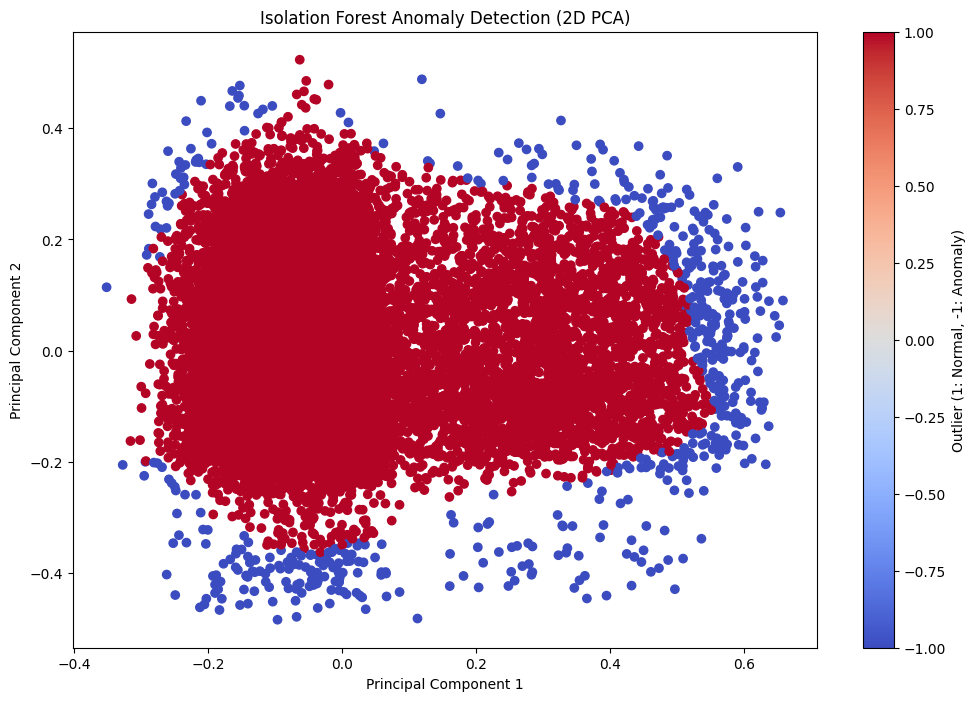

In [ ]:
# visualising the output in 2D
plt.figure(figsize=(12, 8))
plt.scatter(updated_df['pca_1'], updated_df['pca_2'], c= updated_df['anomaly'], cmap='coolwarm')
plt.title('Isolation Forest Anomaly Detection (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Outlier (1: Normal, -1: Anomaly)')
plt.show()

# Reflect

> The objective was to develop a robust anomaly detection system to protect the shipping fleet by evaluating engine functionality. The dataset had six important features to evaluate the engine’s status as good or bad. I decided to follow a structured approach of exploratory data analysis, data preprocessing and anomaly detection using statistical methods like IQR and also using ML models like one-class SVM and Isolation Forest. The 2D visualisation of anomalies by reducing the six features to two using the PCA model will give me a better insight about the distribution of anomalies and normal data behaviour. The visualisation and outputs from the model can then be used to interpret which ships are functioning badly and features that need to be monitored and fixed.


### Reference:
Devabrat, M., 2022. Predictive Maintenance on Ship's Main Engine using AI. Available at: https://dx.doi.org/10.21227/g3za-v415. [Accessed 5 March 2024]